Examen Final:

Métodos Computacionales para físicos



Nota: La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno.




Las aletas son sólidos que transfieren calor por conducción a lo largo de su geometría y por convección a través de su entorno. La ecuación diferencial que describe la temperatura como función de  la longitud de una  aleta viene dada por :


\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kAc} \right ) ^2 (T-T_{\infty})=0
\end{equation}

donde Ac es el  área de la sección transversal Ac, p es perímetro,
k es el coficiente de conducción que depende de cada material y h el coficiente de convección. La temperatura  $T_{\infty}$ es la temperatura ambiente.


![aleta](https://github.com/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/img/aleta.png?raw=true)



En general, el área de la sección transversal A y el perímetro p de una aleta
varían con x, lo cual hace que esta ecuación diferencial sea difícil de resolver. En el caso especial de una sección transversal constante y conductividad térmica constante, la ecuación diferencial se reduce a

\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}


donde  $\theta=T-T_{\infty}$ y $a=\frac{hp}{kAc}$


Para una aleta suficientemente larga de sección transversal uniforme (Ac =
constante), la temperatura en la base de la aleta viene dada por:


\begin{equation}
\theta(0)=\theta_b=T_b-T_{\infty}
\end{equation}


 y en la punta de la aleta, tenderá a la del medio, por consiguiente $\theta$ tenderá a cero.

\begin{equation}
\theta(L)=T(L)-T_{\infty}=0
\end{equation}

La solucion  exacta viene dada por :

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}



Considerando  una aleta rectangular muy larga, fijada a una
superficie plana de tal forma que la temperatura en el extremo
de la aleta es prácticamente la del aire circundante, es decir,
$T_{\infty}=300K$. Asuma que el ancho es de 5.0 cm, el espesor de 1 mm, es decir, su area $A=5\times 10^{-5}m^2$ y su perimetro de $p=0.102m$. La  conductividad térmica es $k=200 W/m K$, la temperatura en la base de $T_b=313K$ y el coeficiente de transferencia de calor es de $h=20 W/m^2K$. Calcule:


In [46]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt



1 (30%) La solución numérica de la ecuación diferencial.

In [47]:
# Datos
w = 0.05  # m
t = 0.001  #  m
p = 0.102  # m
k = 200  # W/(m·K)
Tb = 313  # K
h = 20  # W/(m^2·K)
T_oo = 300  # K



In [48]:
Ac = w * t # m^2

#a
a = (h * p) / (k * Ac)

In [49]:
#EDO
def func(theta, x):
    d_theta = theta[1]
    d_theta2 = a**2 * theta[0]
    return [d_theta, d_theta2]

#PVI
pvi = [Tb-T_oo, 0]


In [50]:
x = np.linspace(0, 1, 100)

#Solución numérica a la EDO
sol = sp.integrate.odeint(func, pvi, x)


In [51]:
sol

array([[1.30000000e+01, 0.00000000e+00],
       [5.18576723e+01, 1.02411620e+04],
       [4.00725867e+02, 8.17050485e+04],
       [3.14517473e+03, 6.41610165e+05],
       [2.46918034e+04, 5.03712720e+06],
       [1.93848586e+05, 3.95451115e+07],
       [1.52185227e+06, 3.10457862e+08],
       [1.19476462e+07, 2.43731982e+09],
       [9.37977045e+07, 1.91347317e+10],
       [7.36380141e+08, 1.50221549e+11],
       [5.78111921e+09, 1.17934832e+12],
       [4.53859868e+10, 9.25874130e+12],
       [3.56312977e+11, 7.26878472e+13],
       [2.79731579e+12, 5.70652421e+14],
       [2.19609617e+13, 4.48003618e+15],
       [1.72409508e+14, 3.51715395e+16],
       [1.35353992e+15, 2.76122144e+17],
       [1.06262719e+16, 2.16775948e+18],
       [8.34239566e+16, 1.70184872e+19],
       [6.54938681e+17, 1.33607491e+20],
       [5.14174457e+18, 1.04891589e+21],
       [4.03664312e+19, 8.23475197e+21],
       [3.16905818e+20, 6.46487869e+22],
       [2.48794096e+21, 5.07539956e+23],
       [1.953214

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

In [52]:
# Temperatura
theta = sol[:, 0]

# Calcular la temperatura (T) total
Tt = T_oo + theta



Text(0.5, 1.0, 'Temperatura en la aleta rectangular')

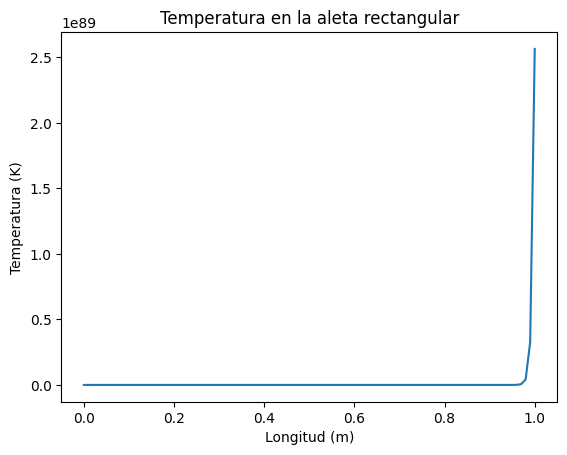

In [53]:
plt.plot(x, Tt, label='Temperatura')
plt.xlabel('Longitud (m)')
plt.ylabel('Temperatura (K)')
plt.title('Temperatura en la aleta rectangular')

3 (25%) Compare la solución numérica con la analítica

In [54]:
#Teorica
x = np.linspace(0, 1, 100)
T =lambda x: T_oo + (Tb-T_oo)*np.exp(-x*np.sqrt(a))

Text(0, 0.5, 'Temperatura')

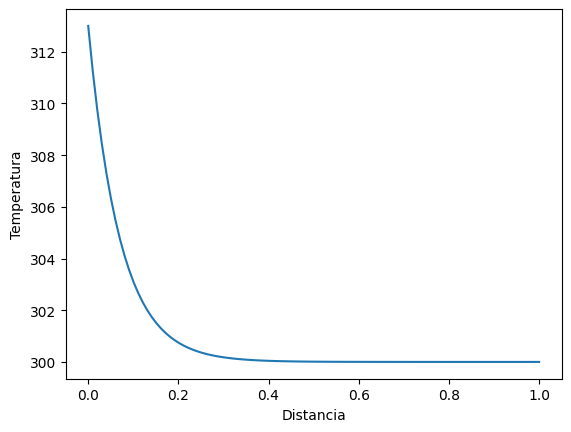

In [55]:
plt.plot(x, T(x), label='S.teórica')
plt.xlabel('Distancia')
plt.ylabel('Temperatura')


Text(0, 0.5, 'Temperatura')

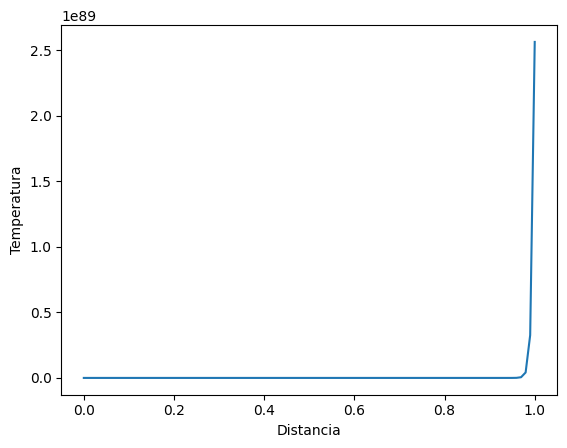

In [56]:
plt.plot(x, Tt, label='S. numerica')
plt.xlabel('Distancia')
plt.ylabel('Temperatura')

La comparación no se puede hacer debido a que la gráfica varia dependiendo de como se tomen las condiciones iniciales


4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K


In [57]:
def Tt(x):
   return T_oo + (Tb-T_oo)*np.exp(-x*np.sqrt(a))-305
x0 = 0.1

In [58]:
a = sp.optimize.newton(Tt,x0)
a

0.06689918232668428

In [59]:
print(f'El valor de X para el cual la temperatura es 305K es: {a}m ' )

El valor de X para el cual la temperatura es 305K es: 0.06689918232668428m 
